# Workflow 4 Notebook: ICEES phenotypes/diseases output for Cohort:22

In [1]:
import iceesclient
import pandas
from importlib import reload
from collections import defaultdict
#from matplotlib.pyplot as plt

In [2]:
reload(iceesclient) #if changes are made to iceesclient, this must be run and all objects re-run

<module 'iceesclient' from '/Users/colincurtis/Documents/renci/translator-workflows/Workflow4/iceesclient.py'>

In [3]:
DefineCohortObject = iceesclient.DefineCohort()

In [4]:
AssociationToAllFeaturesObject = iceesclient.AssociationToAllFeatures()

## If p < 0.1

In [5]:
assoc_to_all_features_low_p = AssociationToAllFeaturesObject.run_association_to_all_features('TotalEDInpatientVisits','<', '2','0.1','COHORT:1')

In [6]:
possible_diagnoses = ['AsthmaDx',
'CroupDx',
'ReactiveAirwayDx',
'CoughDx',
'PneumoniaDx',
'UterineCancerDx',
'CervicalCancerDx',
'OvarianCancerDx',
'ProstateCancerDx',
'TesticularCancerDx',
'KidneyCancerDx',
'PregnancyDx',
'MenopauseDX',
'EndometriosisDx',
'OvarianDysfunctionDx',
'TesticularDysfunction',
'DiabetesDx',
'AlopeciaDx',
'FibromyalgiaDx',
'AlcoholDependenceDx',
'DrugDependenceDx',
'DepressionDx',
'AnxietyDx',
'AutismDx']

In [7]:
#possible_diagnoses

## if p < 1.0

In [8]:
assoc_to_all_features_higher_p = AssociationToAllFeaturesObject.run_association_to_all_features('TotalEDInpatientVisits','<', '2','1.0','COHORT:1')

In [48]:
all_phenotype_dict = defaultdict(dict)

cohort_patient_total = assoc_to_all_features_higher_p['return value'][0]['total']
patients_with_ED_under_2_total_cohort = assoc_to_all_features_higher_p['return value'][0]['columns'][0]['frequency']
patients_with_ED_over_2_total_cohort = assoc_to_all_features_higher_p['return value'][0]['columns'][1]['frequency']
print('cohort_patient_total:', cohort_patient_total)
print()     
print('patients_with_ED_under_2_total_cohort:', patients_with_ED_under_2_total_cohort)
print('patients_with_ED_over_2_total_cohort:', patients_with_ED_over_2_total_cohort)
print()
print()

for a_feature in assoc_to_all_features_higher_p['return value']:
    phenotype_label = a_feature['feature_b']['feature_name'] 
    if phenotype_label.endswith('Dx'):
        single_phenotype_dict = defaultdict(dict)
        single_phenotype_dict['name'] = phenotype_label
        print('Dx:', phenotype_label)

        #
        patients_with_this_Dx = a_feature['rows'][1]['frequency']
        all_phenotype_dict[phenotype_label]['num_patients_this_Dx'] = patients_with_this_Dx
        print('patients with this Dx:', patients_with_this_Dx)
        print()
        #
        num_patients_this_phenotype_ED_over_2 = a_feature['feature_matrix'][1][1]['frequency']
        tx_event = num_patients_this_phenotype_ED_over_2
        all_phenotype_dict[phenotype_label]['tx_event'] = tx_event
        #
        num_patients_this_phenotype_ED_under_2 = a_feature['feature_matrix'][1][0]['frequency']
        tx_no_event = num_patients_this_phenotype_ED_under_2
        all_phenotype_dict[phenotype_label]['tx_no_event'] = tx_no_event
        #
        num_patients_other_phenotypes_ED_over_2 = a_feature['feature_matrix'][0][1]['frequency']
        no_tx_event = num_patients_other_phenotypes_ED_over_2
        all_phenotype_dict[phenotype_label]['no_tx_event'] = no_tx_event
        #
        num_patients_other_phenotypes_ED_under_2 = a_feature['feature_matrix'][0][0]['frequency']
        no_tx_no_event = num_patients_other_phenotypes_ED_under_2
        all_phenotype_dict[phenotype_label]['no_tx_no_event'] = no_tx_no_event
        #
        risk_ratio = (tx_event/(tx_event+tx_no_event))/(no_tx_event/(no_tx_event+no_tx_no_event))
        all_phenotype_dict[phenotype_label]['risk ratio'] = risk_ratio
        #
        odds_ratio = (tx_event*no_tx_no_event)/(tx_no_event*no_tx_event)
        all_phenotype_dict[phenotype_label]['odds ratio'] = odds_ratio
        #
# print(all_phenotype_dict)
# print()

cohort_patient_total: 22810

patients_with_ED_under_2_total_cohort: 21288
patients_with_ED_over_2_total_cohort: 1522


Dx: AsthmaDx
patients with this Dx: 7895

Dx: CroupDx
patients with this Dx: 362

Dx: CoughDx
patients with this Dx: 16716

Dx: PneumoniaDx
patients with this Dx: 458

Dx: ObesityDx
patients with this Dx: 2458

Dx: UterineCancerDx
patients with this Dx: 49

Dx: CervicalCancerDx
patients with this Dx: 16

Dx: OvarianCancerDx
patients with this Dx: 39

Dx: TesticularCancerDx
patients with this Dx: 10

Dx: KidneyCancerDx
patients with this Dx: 66

Dx: EndometriosisDx
patients with this Dx: 85

Dx: OvarianDysfunctionDx
patients with this Dx: 86

Dx: TesticularDysfunctionDx
patients with this Dx: 97

Dx: PregnancyDx
patients with this Dx: 238

Dx: MenopauseDx
patients with this Dx: 203

Dx: DiabetesDx
patients with this Dx: 3449

Dx: AlopeciaDx
patients with this Dx: 185

Dx: FibromyalgiaDx
patients with this Dx: 3259

Dx: AlcoholDependenceDx
patients with this Dx: 343

Dx:

In [38]:
all_phenotype_dict_df = pandas.DataFrame(all_phenotype_dict)

In [39]:
interested_in = ['odds ratio', 'risk ratio']

In [40]:
sorted_all_phenotype_dict_df = all_phenotype_dict_df.T.sort_values('risk ratio', ascending=False).T

In [46]:
sorted_all_phenotype_dict_df.round(0)

,DrugDependenceDx,PneumoniaDx,AlcoholDependenceDx,AnxietyDx,OvarianDysfunctionDx,FibromyalgiaDx,DiabetesDx,OvarianCancerDx,ObesityDx,AsthmaDx,...,TesticularCancerDx,PregnancyDx,UterineCancerDx,AlopeciaDx,TesticularDysfunctionDx,CroupDx,CervicalCancerDx,KidneyCancerDx,MenopauseDx,AutismDx
no_tx_event,1447.0,1389.0,1427.0,1105.0,1504.0,1058.0,1074.0,1516.0,1198.0,757.0,...,1521.0,1501.0,1518.0,1507.0,1515.0,1497.0,1521.0,1518.0,1513.0,1519.0
no_tx_no_event,21118.0,20963.0,21040.0,19341.0,21220.0,18493.0,18287.0,21255.0,19154.0,14158.0,...,21279.0,21071.0,21243.0,21118.0,21198.0,20951.0,21273.0,21226.0,21094.0,21213.0
num_patients_this_Dx,245.0,458.0,343.0,2364.0,86.0,3259.0,3449.0,39.0,2458.0,7895.0,...,10.0,238.0,49.0,185.0,97.0,362.0,16.0,66.0,203.0,78.0
odds ratio,6.0,6.0,6.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
risk ratio,5.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
tx_event,75.0,133.0,95.0,417.0,18.0,464.0,448.0,6.0,324.0,765.0,...,1.0,21.0,4.0,15.0,7.0,25.0,1.0,4.0,9.0,3.0
tx_no_event,170.0,325.0,248.0,1947.0,68.0,2795.0,3001.0,33.0,2134.0,7130.0,...,9.0,217.0,45.0,170.0,90.0,337.0,15.0,62.0,194.0,75.0


In [44]:
odds_and_risk_df = sorted_all_phenotype_dict_df.iloc[3:5]

In [45]:
odds_and_risk_df.round(3)

,DrugDependenceDx,PneumoniaDx,AlcoholDependenceDx,AnxietyDx,OvarianDysfunctionDx,FibromyalgiaDx,DiabetesDx,OvarianCancerDx,ObesityDx,AsthmaDx,...,TesticularCancerDx,PregnancyDx,UterineCancerDx,AlopeciaDx,TesticularDysfunctionDx,CroupDx,CervicalCancerDx,KidneyCancerDx,MenopauseDx,AutismDx
odds ratio,6.439,6.176,5.648,3.749,3.735,2.902,2.542,2.549,2.427,2.007,...,1.554,1.359,1.244,1.236,1.088,1.038,0.932,0.902,0.647,0.559
risk ratio,4.774,4.673,4.361,3.264,3.162,2.631,2.342,2.311,2.239,1.909,...,1.499,1.327,1.224,1.217,1.082,1.036,0.937,0.908,0.662,0.576


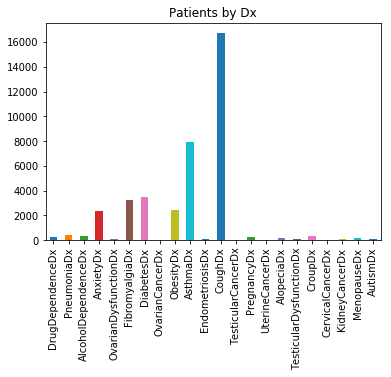

In [47]:
patient_Dx_plot = sorted_all_phenotype_dict_df.iloc[2].plot(kind='bar',title = 'Patients by Dx')

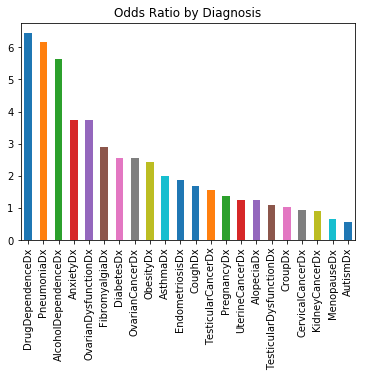

In [31]:
odds_ratio_plot = odds_and_risk_df.iloc[0].plot(kind='bar',title = 'Odds Ratio by Diagnosis')

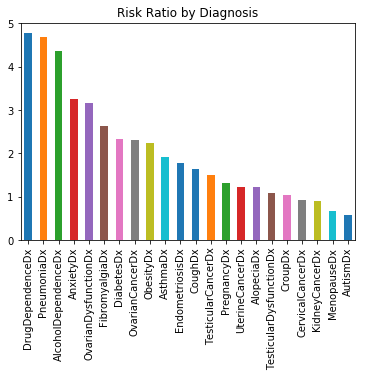

In [32]:
risk_ratio_plot = odds_and_risk_df.iloc[1].plot(kind='bar',title = 'Risk Ratio by Diagnosis')